<a href="https://colab.research.google.com/github/t1360/CS-SBU-eDataMining-MSc-2022/blob/400422034/datamining_immo_data_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apartment rental offers in germany**

What we expected from this code:


*   Data cleaning to clear the outliers and remove columns that doesn't have high correlation to the prediction
*   Create virtualization to have a better understanding of the data of the rental in Germany.

*   Feature engineering from the original variable to create a better model

In [312]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'
#! ls '/gdrive/MyDrive/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [313]:
import time

# Data Overview

Import all important libraries

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [315]:
pd.set_option('display.max_columns',None)  #to show all columns
imo=pd.read_csv(root+"immo_data.csv")  #reading dataset

In [316]:
s_time = time.time()
print("The dataset name : apartment-rental-offers-in-germany ,immo_data.csv")
print("Number of features in dataset: ", len(imo.columns))
print("Number of records in dataset: ", len(imo))
print(f'run time : {time.time() - s_time}')

The dataset name : apartment-rental-offers-in-germany ,immo_data.csv
Number of features in dataset:  49
Number of records in dataset:  268850
run time : 0.0003902912139892578


In [317]:
imo.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.0,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.0,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.8,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19


In [318]:
s_time = time.time()
print("list of features and their types:")
print('--------------------------------------------')
imo.info()
print(f'run time : {time.time() - s_time}')

list of features and their types:
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId              

In [319]:
imo.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [320]:
s_time = time.time()
print(f'Number of columns is:',imo.shape[1])
print(f'Number of rows is:',imo.shape[0])
print(f'run time : {time.time() - s_time}')

Number of columns is: 49
Number of rows is: 268850
run time : 0.0023484230041503906


# Preprocessing data

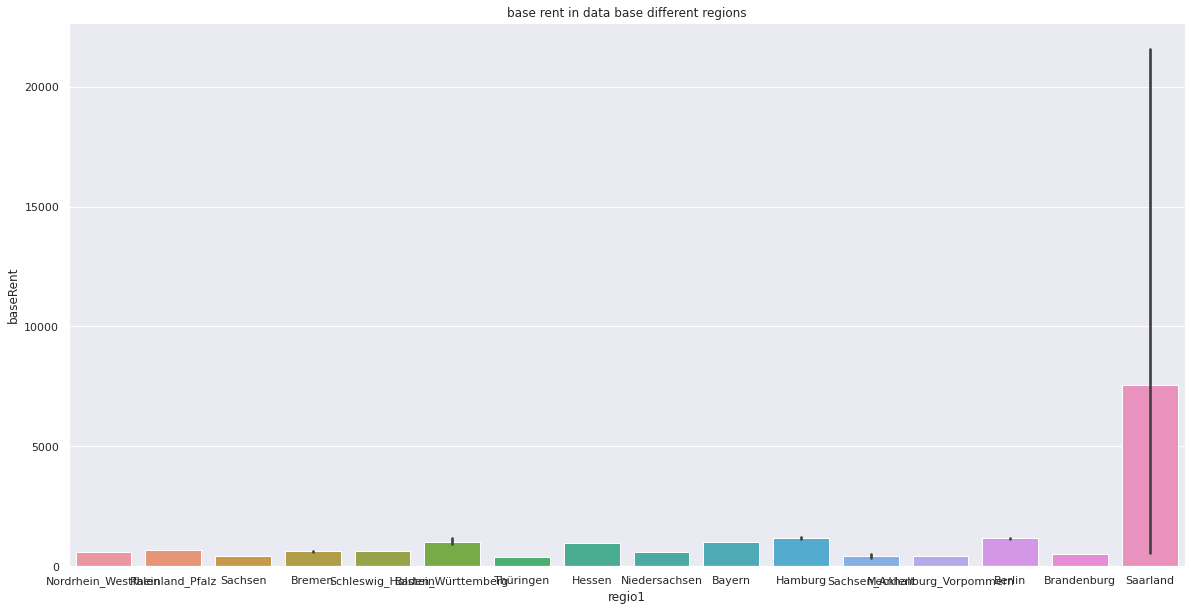

run time : 3.9079439640045166


In [321]:
s_time = time.time()

#plot the data against base_rent(target_variable)
plt.figure(figsize=(20,10))

sns.barplot(x=imo.regio1, y=imo.baseRent,saturation=0.75)
plt.title('base rent in data base different regions')
plt.show()

print(f'run time : {time.time() - s_time}')

In [322]:
s_time = time.time()
print(imo.count())
print(f'run time : {time.time() - s_time}')

regio1                      268850
serviceCharge               261941
heatingType                 223994
telekomTvOffer              236231
telekomHybridUploadSpeed     45020
newlyConst                  268850
balcony                     268850
picturecount                268850
pricetrend                  267018
telekomUploadSpeed          235492
totalRent                   228333
yearConstructed             211805
scoutId                     268850
noParkSpaces                 93052
firingTypes                 211886
hasKitchen                  268850
geo_bln                     268850
cellar                      268850
yearConstructedRange        211805
baseRent                    268850
houseNumber                 197832
livingSpace                 268850
geo_krs                     268850
condition                   200361
interiorQual                156185
petsAllowed                 154277
street                      268850
streetPlain                 197837
lift                

In [323]:
s_time = time.time()
#deleting outliers
imo = imo[imo.baseRent.between(50,10000, inclusive=True)]
imo = imo[imo.noRooms.between(0,15, inclusive=True)]
imo = imo[imo.livingSpace.between(50,30000, inclusive=True)]
imo.shape

print(f'run time : {time.time() - s_time}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



run time : 0.3133728504180908


**Delete duplicates**

In [324]:
s_time = time.time()
imo=imo.drop_duplicates()  #delete duplicate records
print(f'run time : {time.time() - s_time}')

run time : 1.0368154048919678


**Checking the missing data**

As we can see, the number of records are not the same, so it's clear that we have some null data that should be managed:







In [325]:
s_time = time.time()
print('Number of NaN values in each columns is:')
print(imo.isna().sum())
print(f'run time : {time.time() - s_time}')

Number of NaN values in each columns is:
regio1                           0
serviceCharge                 5388
heatingType                  34844
telekomTvOffer               26928
telekomHybridUploadSpeed    182421
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1577
telekomUploadSpeed           27557
totalRent                    33815
yearConstructed              44842
scoutId                          0
noParkSpaces                136397
firingTypes                  44984
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         44842
baseRent                         0
houseNumber                  60687
livingSpace                      0
geo_krs                          0
condition                    53336
interiorQual                 89331
petsAllowed                  92080
street                           0
streetPlain   

**Delete culomns with more than %30 null values (if such columns exist):**

In [326]:
s_time = time.time()
print('\nfeatures:\t\tpercent of null values:')
print(imo.isna().sum()/len(imo))
print(f'run time : {time.time() - s_time}')


features:		percent of null values:
regio1                      0.000000
serviceCharge               0.024676
heatingType                 0.159576
telekomTvOffer              0.123323
telekomHybridUploadSpeed    0.835437
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.007222
telekomUploadSpeed          0.126203
totalRent                   0.154863
yearConstructed             0.205364
scoutId                     0.000000
noParkSpaces                0.624660
firingTypes                 0.206014
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.205364
baseRent                    0.000000
houseNumber                 0.277929
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.244264
interiorQual                0.409111
petsAllowed                 0.421701
st

In [327]:
s_time = time.time()
print(imo.shape)
print(f'run time : {time.time() - s_time}')

(218354, 49)
run time : 0.0011444091796875


As we can see,there is a lot of missing value in some columns, so we can remove all of the columns that contain missing value more than 30%

In [328]:
s_time = time.time()
nullcolumns=imo.columns[((imo.isna().sum()/len(imo)) > 0.30)] #mask
print('null columns list:')

print(nullcolumns)
print(f'run time : {time.time() - s_time}')

null columns list:
Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'interiorQual',
       'petsAllowed', 'thermalChar', 'numberOfFloors', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')
run time : 0.23708629608154297


In [329]:
print('number of null columns:',len(nullcolumns))

number of null columns: 11


In [330]:
s_time = time.time()
imo=imo.drop(nullcolumns,axis=1)
print(f'run time : {time.time() - s_time}')

run time : 0.04761838912963867


In [331]:
imo.shape

(218354, 38)

**Delete culomns without usefull information (if such columns exist):**


In [332]:
s_time = time.time()
print(imo.head(3))
print(f'run time : {time.time() - s_time}')

                regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen          245.0                 central_heating   
1      Rheinland_Pfalz          134.0  self_contained_central_heating   
2              Sachsen          255.0                   floor_heating   

  telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0  ONE_YEAR_FREE       False    False             6        4.62   
1  ONE_YEAR_FREE       False     True             8        3.47   
2  ONE_YEAR_FREE        True     True             8        2.72   

   telekomUploadSpeed  totalRent  yearConstructed    scoutId firingTypes  \
0                10.0      840.0           1965.0   96107057         oil   
1                10.0        NaN           1871.0  111378734         gas   
2                 2.4     1300.0           2019.0  113147523         NaN   

   hasKitchen              geo_bln  cellar  yearConstructedRange  baseRent  \
0       False  Nordrhein_Westfalen    True             

we have to predict rental price (totaRent) so we should drop all the rows that doesn't deal with rental price

In [333]:
s_time = time.time()

imo=imo.drop(columns=['telekomTvOffer','pricetrend','livingSpaceRange','street','description',
                      'facilities','geo_krs','geo_plz','scoutId','regio1','telekomUploadSpeed',
                      'telekomTvOffer','pricetrend','regio3','noRoomsRange','picturecount','geo_bln','date',
                      'houseNumber','streetPlain','firingTypes'])
print(imo.shape)
print(f'run time : {time.time() - s_time}')

(218354, 19)
run time : 0.04351019859313965


In [334]:
s_time = time.time()

print('Number of NaN values in each columns :')
print(imo.isna().sum())
print(f'run time : {time.time() - s_time}')

Number of NaN values in each columns :
serviceCharge            5388
heatingType             34844
newlyConst                  0
balcony                     0
totalRent               33815
yearConstructed         44842
hasKitchen                  0
cellar                      0
yearConstructedRange    44842
baseRent                    0
livingSpace                 0
condition               53336
lift                        0
baseRentRange               0
typeOfFlat              27426
noRooms                     0
floor                   40994
garden                      0
regio2                      0
dtype: int64
run time : 0.0734565258026123


we can see that number of columns have reduced

**Filling NaN numeric datas with mean of each column**

In [335]:
s_time = time.time()
print('\nfeatures: \t\t\t mean values:')
print(imo._get_numeric_data().mean())
print(f'run time : {time.time() - s_time}')


features: 			 mean values:
serviceCharge            165.098158
newlyConst                 0.089323
balcony                    0.667389
totalRent                990.771730
yearConstructed         1967.167251
hasKitchen                 0.331595
cellar                     0.662704
yearConstructedRange       3.821194
baseRent                 713.016110
livingSpace               81.808912
lift                       0.238100
baseRentRange              4.165337
noRooms                    2.890524
floor                      2.122311
garden                     0.204549
dtype: float64
run time : 0.01802229881286621


In [336]:
s_time = time.time()
imo.fillna(imo._get_numeric_data().mean(),inplace = True)
print(f'run time : {time.time() - s_time}')

run time : 0.018535852432250977


In [337]:
s_time = time.time()
print(imo.isna().sum())
print(f'run time : {time.time() - s_time}')

serviceCharge               0
heatingType             34844
newlyConst                  0
balcony                     0
totalRent                   0
yearConstructed             0
hasKitchen                  0
cellar                      0
yearConstructedRange        0
baseRent                    0
livingSpace                 0
condition               53336
lift                        0
baseRentRange               0
typeOfFlat              27426
noRooms                     0
floor                       0
garden                      0
regio2                      0
dtype: int64
run time : 0.05152130126953125


**Delete outlier data**

In [338]:
imo.shape

(218354, 19)

In [339]:
imo.describe()

,serviceCharge,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,floor
count,218354.000000,2.183540e+05,218354.000000,218354.000000,218354.00000,218354.000000,218354.000000,218354.000000,218354.000000
mean,165.098158,9.907717e+02,1967.167251,3.821194,713.01611,81.808912,4.165337,2.890524,2.122311
std,329.625855,3.381776e+04,42.308147,2.507566,514.76159,46.525723,2.159036,0.864080,3.520674
min,0.000000,0.000000e+00,1000.000000,1.000000,57.00000,50.000000,1.000000,1.000000,-1.000000
25%,110.000000,5.568700e+02,1958.000000,2.000000,380.00000,61.000000,2.000000,2.000000,1.000000
50%,150.000000,8.300000e+02,1967.167251,3.821194,555.00000,73.500000,4.000000,3.000000,2.000000
75%,200.000000,9.907717e+02,1994.000000,5.000000,880.00000,92.510000,6.000000,3.000000,3.000000
max,146118.000000,1.575154e+07,2090.000000,9.000000,10000.00000,10259.000000,9.000000,15.000000,999.000000


In [340]:
s_time = time.time()
#deleting outliers
imo = imo[imo.totalRent.between(65,8000, inclusive=True)]
imo = imo[imo.noRooms.between(1,12, inclusive=True)]
imo = imo[imo.livingSpace.between(60,10000, inclusive=True)]
imo.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



(173438, 19)

**Dataset distribution plot after deleting outlier data**

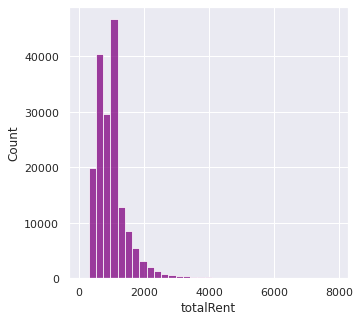

In [348]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(5,5)})
sns.histplot(imo['totalRent'],bins=35,color='purple')  
plt.show()

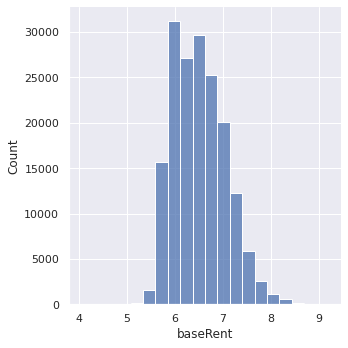

In [351]:
sns.set(rc={'figure.figsize':(15,10)})
sns.displot(np.log(imo["baseRent"]),kde_kws={"label": 'livingSpace'}, bins=20)

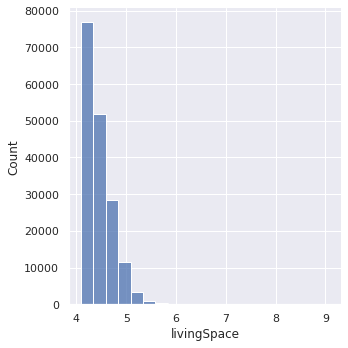

In [352]:
sns.set(rc={'figure.figsize':(15,10)})
sns.displot(np.log(imo["livingSpace"]),kde_kws={"label": 'livingSpace'}, bins=20)

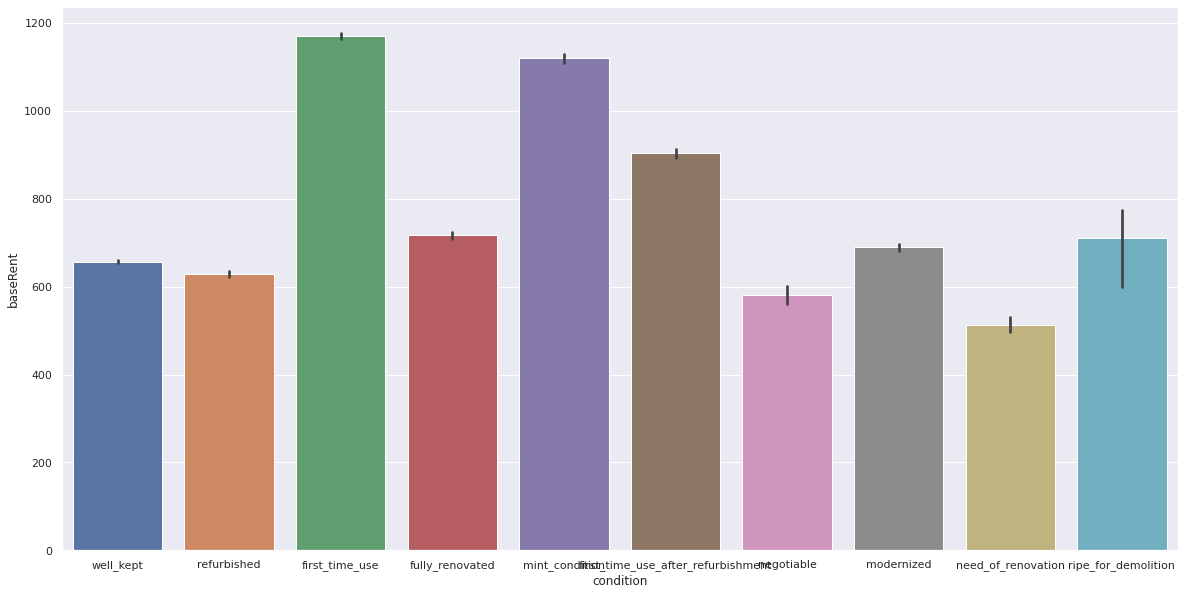

In [353]:
plt.figure(figsize=(20,10))

sns.barplot(x=imo.condition, y=imo.baseRent,saturation=0.75)
plt.show()

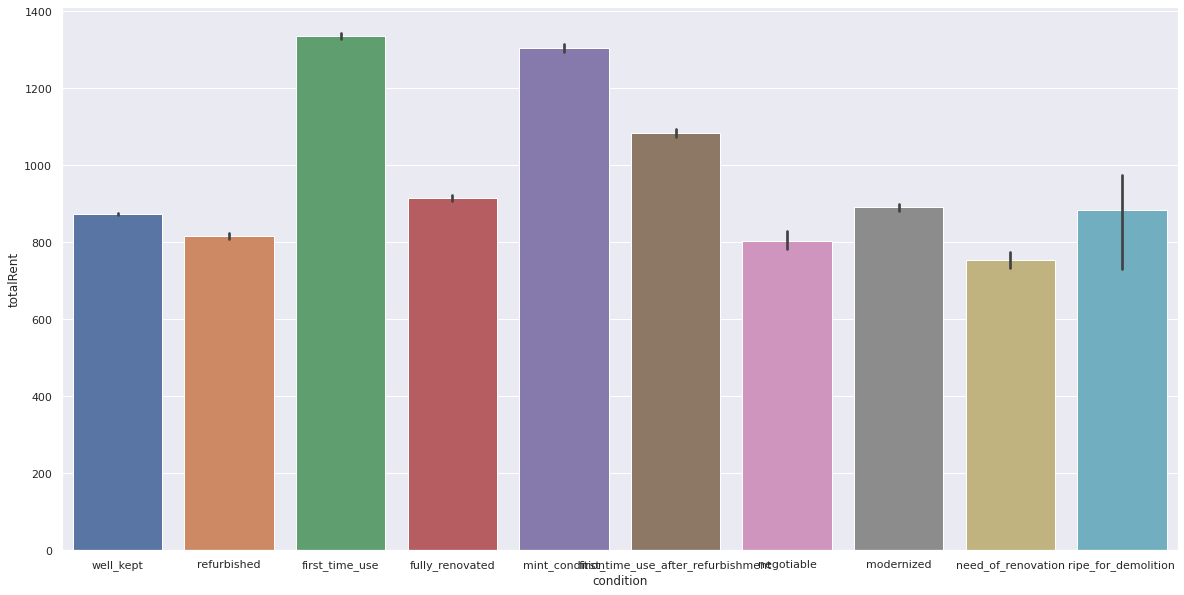

In [354]:
plt.figure(figsize=(20,10))

sns.barplot(x=imo.condition, y=imo.totalRent,saturation=0.75)
plt.show()

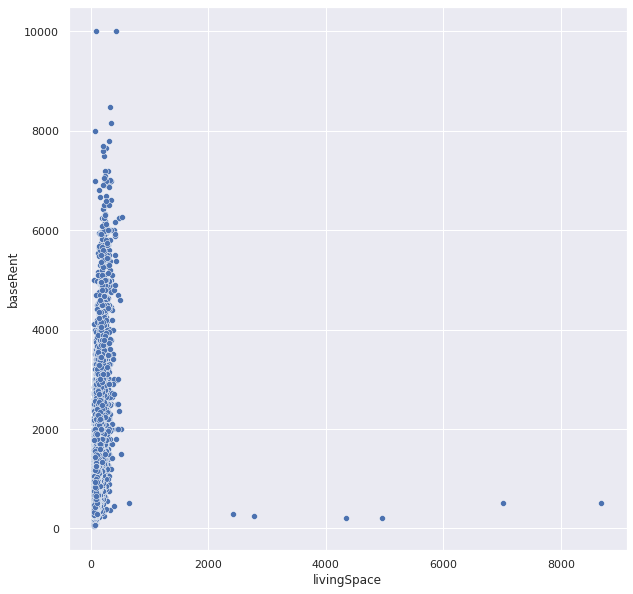

In [356]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=imo.livingSpace, y=imo.baseRent)
plt.show()

In [355]:
imo.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'condition', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'floor', 'garden', 'regio2'],
      dtype='object')

# **filling categorical data**

we can replace null datas using 2 methods:
1. replace with most frequents of each columns       or
2. replace with pre-phrases

In [357]:
s_time = time.time()

print('list of most frequents:\n')  #fill with most frequents
for cols in imo.columns:
   if (imo[cols].dtypes == 'object' or imo[cols].dtypes == 'bool'):
      print(cols,": ",imo[cols].value_counts().head(1),"\n")  

print(f'run time : {time.time() - s_time}')      

list of most frequents:

heatingType :  central_heating    80309
Name: heatingType, dtype: int64 

newlyConst :  False    155528
Name: newlyConst, dtype: int64 

balcony :  True    121419
Name: balcony, dtype: int64 

hasKitchen :  False    112821
Name: hasKitchen, dtype: int64 

cellar :  True    115266
Name: cellar, dtype: int64 

condition :  well_kept    42558
Name: condition, dtype: int64 

lift :  False    128858
Name: lift, dtype: int64 

typeOfFlat :  apartment    84562
Name: typeOfFlat, dtype: int64 

garden :  False    136660
Name: garden, dtype: int64 

regio2 :  Leipzig    8739
Name: regio2, dtype: int64 

run time : 0.08386588096618652


**Fill NaN values with most frequents**

In [358]:
s_time = time.time()
#fill NaN values with most frequents
for cols in imo.columns:
   if (imo[cols].dtypes == 'object' or imo[cols].dtypes == 'bool'):
       imo[cols].fillna(imo[cols].value_counts().head(1).index[0],inplace=True)
print(f'run time : {time.time() - s_time}')     

run time : 0.09892654418945312


In [359]:
print(imo.isna().sum())

serviceCharge           0
heatingType             0
newlyConst              0
balcony                 0
totalRent               0
yearConstructed         0
hasKitchen              0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
condition               0
lift                    0
baseRentRange           0
typeOfFlat              0
noRooms                 0
floor                   0
garden                  0
regio2                  0
dtype: int64


**Categorical features**

In [360]:
s_time = time.time()
import datetime
from datetime import date
imo['yearConstructed'] = date.today().year - imo["yearConstructed"]
print(f'run time : {time.time() - s_time}')

run time : 0.0026123523712158203


In [361]:
s_time = time.time()
print(imo.dtypes)
print(f'run time : {time.time() - s_time}')

serviceCharge           float64
heatingType              object
newlyConst                 bool
balcony                    bool
totalRent               float64
yearConstructed         float64
hasKitchen                 bool
cellar                     bool
yearConstructedRange    float64
baseRent                float64
livingSpace             float64
condition                object
lift                       bool
baseRentRange             int64
typeOfFlat               object
noRooms                 float64
floor                   float64
garden                     bool
regio2                   object
dtype: object
run time : 0.0028562545776367188


In [362]:
for cols in imo.columns:
   if (imo[cols].dtypes == 'object' or imo[cols].dtypes == 'bool'):
     #number of unique values for each column excempt NaN values
      print('column: {}, unique values : {}'.format(cols,imo[cols].nunique())) 
        

column: heatingType, unique values : 13
column: newlyConst, unique values : 2
column: balcony, unique values : 2
column: hasKitchen, unique values : 2
column: cellar, unique values : 2
column: condition, unique values : 10
column: lift, unique values : 2
column: typeOfFlat, unique values : 10
column: garden, unique values : 2
column: regio2, unique values : 419


**Reduce number of categories**

In [364]:
s_time = time.time()

otherscondition = imo['condition'].value_counts().tail(3).index

othersregion = list(imo['condition'].value_counts().tail(3).index)
def editcondition(dflist):
    if dflist in otherscondition:
        return 'Other'
    else:
        return dflist

imo['condition_edit'] =imo['condition'].apply(editcondition)
print(imo['condition_edit'].value_counts())

print(f'run time : {time.time() - s_time}')

well_kept                             82237
first_time_use                        18527
fully_renovated                       16646
mint_condition                        16455
refurbished                           15238
first_time_use_after_refurbishment    11297
modernized                            10696
Other                                  2342
Name: condition_edit, dtype: int64
run time : 0.13560247421264648


In [365]:
s_time = time.time()

othersheatingType = imo['heatingType'].value_counts().head(3).index

othersregion = list(imo['heatingType'].value_counts().head(3).index)
def editheatingType(dflist):
    if dflist in othersheatingType:
        return 'Other'
    else:
        return dflist

imo['heatingType_edit'] =imo['heatingType'].apply(editheatingType)

imo = imo.drop(columns = ['heatingType'])
imo['heatingType_edit'].value_counts()*100 / len(imo)

print(f'run time : {time.time() - s_time}')

run time : 0.5016958713531494


In [366]:
imo['heatingType_edit'].value_counts()*100 / len(imo)

Other                             78.515666
gas_heating                        8.043797
self_contained_central_heating     7.543330
oil_heating                        2.199633
heat_pump                          1.409149
combined_heat_and_power_plant      0.904069
night_storage_heater               0.477404
wood_pellet_heating                0.420900
electric_heating                   0.300972
stove_heating                      0.103207
solar_heating                      0.081874
Name: heatingType_edit, dtype: float64

In [367]:
s_time = time.time()

others = list(imo['regio2'].value_counts().head(10).index)
def edit_name(x):
    if x in others:
        return 'other'
    else:
        return x

imo['regio2_edit'] = imo['regio2'].apply(edit_name)
imo = imo.drop(columns = ['regio2'])
print(imo['regio2_edit'].value_counts()*100 / len(imo))

print(f'run time : {time.time() - s_time}')

other                           24.707965
Duisburg                         1.262699
Recklinghausen_Kreis             1.162952
Dortmund                         1.156609
Halle_Saale                      1.134123
                                  ...    
Haßberge_Kreis                   0.012685
Lichtenfels_Kreis                0.012685
Freyung_Grafenau_Kreis           0.011531
Neustadt_a.d._Waldnaab_Kreis     0.006919
Kronach_Kreis                    0.005766
Name: regio2_edit, Length: 410, dtype: float64
run time : 0.10978245735168457


below rows contains less data to predict anything so we choose just the top values

In [368]:
s_time = time.time()

regionlist = list(imo['regio2_edit'].value_counts().head(25).index)

print(f'run time : {time.time() - s_time}')

run time : 0.023003339767456055


In [369]:
s_time = time.time()
imo = imo[pd.DataFrame(imo['regio2_edit'].tolist()).isin(regionlist).any(1).values]
print(imo['regio2_edit'].value_counts())

print(f'run time : {time.time() - s_time}')

other                                     42853
Duisburg                                   2190
Recklinghausen_Kreis                       2017
Dortmund                                   2006
Halle_Saale                                1967
Gelsenkirchen                              1767
Köln                                       1712
Wuppertal                                  1537
Bremen                                     1415
Mittelsachsen_Kreis                        1382
Wiesbaden                                  1323
Zwickau                                    1267
Hannover                                   1249
Aachen                                     1186
Stuttgart                                  1161
Zwickau_Kreis                              1159
Bochum                                     1154
Mettmann_Kreis                             1140
Meißen_Kreis                               1112
Märkischer_Kreis                           1103
Leipzig_Kreis                           

In [370]:
imo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75882 entries, 0 to 268849
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   serviceCharge         75882 non-null  float64
 1   newlyConst            75882 non-null  bool   
 2   balcony               75882 non-null  bool   
 3   totalRent             75882 non-null  float64
 4   yearConstructed       75882 non-null  float64
 5   hasKitchen            75882 non-null  bool   
 6   cellar                75882 non-null  bool   
 7   yearConstructedRange  75882 non-null  float64
 8   baseRent              75882 non-null  float64
 9   livingSpace           75882 non-null  float64
 10  condition             75882 non-null  object 
 11  lift                  75882 non-null  bool   
 12  baseRentRange         75882 non-null  int64  
 13  typeOfFlat            75882 non-null  object 
 14  noRooms               75882 non-null  float64
 15  floor             

In [371]:
imo.columns

Index(['serviceCharge', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'condition', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'floor', 'garden', 'condition_edit',
       'heatingType_edit', 'regio2_edit'],
      dtype='object')

**Correlation matrix**

Using this matrix, we can see the linear convergence of the data.
The closer the numbers to 1,means more convergent , and the closer numbers to -1, means more inversely relations.
In the next steps, we can further study the variables that are more convergent

In [372]:
s_time = time.time()
corr=imo.corr()
print(f'run time : {time.time() - s_time}')

run time : 0.05744767189025879


run time : 0.27672243118286133


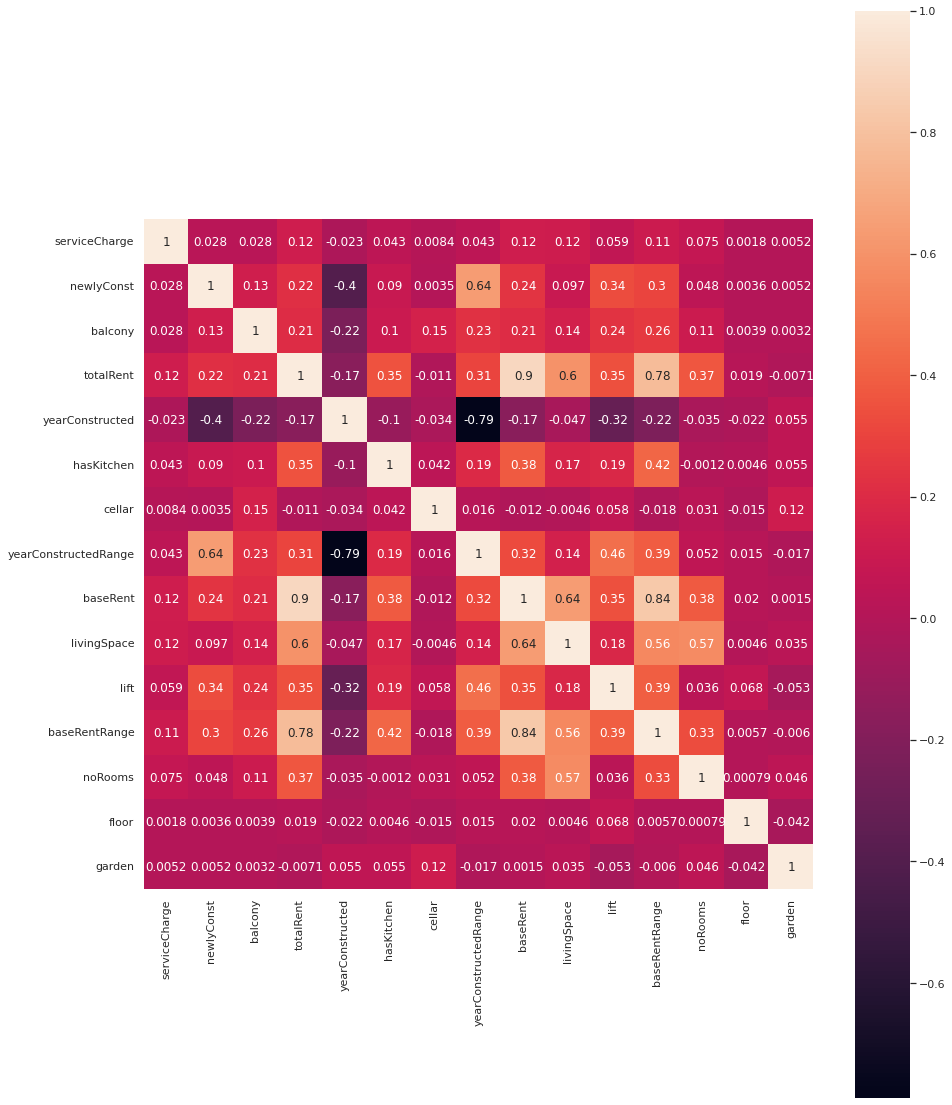

In [373]:
s_time = time.time()
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize=(15,20))
#sns.heatmap(corr, square = True ,annot = True)

sns.heatmap(corr,square= True,annot=True,vmax=None, cmap=None, center=None,
            cbar=True, cbar_kws=None, cbar_ax=None,  xticklabels="auto", yticklabels="auto")

print(f'run time : {time.time() - s_time}')

In [68]:
s_time = time.time()
imo=imo.fillna(method="ffill")
print(f'run time : {time.time() - s_time}')

run time : 0.04061174392700195


# **convert categorical data to dummies**

In [374]:
s_time = time.time()
columns1=[]
for cols in imo.columns:
    if imo[cols].dtype == 'object' or imo[cols].dtype == 'bool':
        columns1.append(cols)   
print(columns1)     

print(f'run time : {time.time() - s_time}')

['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'condition', 'lift', 'typeOfFlat', 'garden', 'condition_edit', 'heatingType_edit', 'regio2_edit']
run time : 0.0006022453308105469


In [377]:
columns1=['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'condition', 'lift', 'typeOfFlat', 'garden', 'condition_edit', 'heatingType_edit', 'regio2_edit']

In [378]:
s_time = time.time()

s=pd.Series(columns1)
dummies_feature=pd.get_dummies(s)
dummies_feature

print(f'run time : {time.time() - s_time}')

run time : 0.005861520767211914


In [379]:
dummies_feature

,balcony,cellar,condition,condition_edit,garden,hasKitchen,heatingType_edit,lift,newlyConst,regio2_edit,typeOfFlat
0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0


In [380]:
s_time = time.time()

imo.drop(columns=columns1,inplace=True)
imo=pd.concat([imo,dummies_feature],axis=1)
print(imo.shape)

print(f'run time : {time.time() - s_time}')

(75887, 20)
run time : 0.021792173385620117


In [381]:
s_time = time.time()
imo = imo.dropna(how='all', axis=1)
print(imo)
print(f'run time : {time.time() - s_time}')

        serviceCharge   totalRent  yearConstructed  yearConstructedRange  \
0              245.00   840.00000        57.000000              2.000000   
1                 NaN         NaN              NaN                   NaN   
2              255.00  1300.00000         3.000000              9.000000   
3                 NaN         NaN              NaN                   NaN   
4              138.00   903.00000        72.000000              1.000000   
...               ...         ...              ...                   ...   
268839         100.00  1980.00000       122.000000              1.000000   
268840         112.13  1479.64000         6.000000              9.000000   
268844          80.00   670.00000        54.832749              3.821194   
268848         175.00  1015.00000         3.000000              9.000000   
268849         315.00   990.77173        50.000000              3.000000   

        baseRent  livingSpace  baseRentRange  noRooms     floor  balcony  \
0         5

In [382]:
s_time = time.time()
imo=imo.fillna(method="ffill")
print(f'run time : {time.time() - s_time}')

run time : 0.008544445037841797


In [383]:
s_time = time.time()
print(imo.isna().sum())
print(f'run time : {time.time() - s_time}')

serviceCharge           0
totalRent               0
yearConstructed         0
yearConstructedRange    0
baseRent                0
livingSpace             0
baseRentRange           0
noRooms                 0
floor                   0
balcony                 0
cellar                  0
condition               0
condition_edit          0
garden                  0
hasKitchen              0
heatingType_edit        0
lift                    0
newlyConst              0
regio2_edit             0
typeOfFlat              0
dtype: int64
run time : 0.008164644241333008


In [384]:
imo.shape

(75887, 20)

In [385]:
imo.dtypes

serviceCharge           float64
totalRent               float64
yearConstructed         float64
yearConstructedRange    float64
baseRent                float64
livingSpace             float64
baseRentRange           float64
noRooms                 float64
floor                   float64
balcony                 float64
cellar                  float64
condition               float64
condition_edit          float64
garden                  float64
hasKitchen              float64
heatingType_edit        float64
lift                    float64
newlyConst              float64
regio2_edit             float64
typeOfFlat              float64
dtype: object

In [386]:
s_time = time.time()
print(imo['baseRent'].describe().round(2))
print(f'run time : {time.time() - s_time}')

count    75887.00
mean       867.03
std        675.03
min         89.00
25%        420.00
50%        630.00
75%       1100.00
max      10000.00
Name: baseRent, dtype: float64
run time : 0.013744115829467773


In [387]:
s_time = time.time()
print(imo['totalRent'].describe().round(2))
print(f'run time : {time.time() - s_time}')

count    75887.00
mean      1062.63
std        683.14
min        112.00
25%        610.00
50%        940.00
75%       1242.00
max       7880.00
Name: totalRent, dtype: float64
run time : 0.008704662322998047


In [388]:
imo.describe()

,serviceCharge,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,floor,balcony,cellar,condition,condition_edit,garden,hasKitchen,heatingType_edit,lift,newlyConst,regio2_edit,typeOfFlat
count,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000,75887.000000
mean,188.698239,1062.628853,59.394662,3.668176,867.026968,87.620237,4.722917,3.020521,2.362160,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.999868,0.000013
std,543.038130,683.144788,43.555430,2.590389,675.034838,35.705420,2.280766,0.851904,5.022488,0.003630,0.003630,0.003630,0.003630,0.003630,0.003630,0.003630,0.003630,0.003630,0.011479,0.003630
min,0.000000,112.000000,-4.000000,1.000000,89.000000,60.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,610.000000,31.000000,1.000000,420.000000,67.000000,3.000000,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,165.000000,940.000000,54.832749,3.821194,630.000000,77.420000,5.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,223.670000,1242.000000,85.000000,5.000000,1100.000000,97.000000,7.000000,3.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,146118.000000,7880.000000,995.000000,9.000000,10000.000000,4947.000000,9.000000,11.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [389]:
imo = imo[(imo['baseRent'] > 50) & (imo['baseRent'] <7850)]   #delete outlier data
imo = imo[(imo['totalRent'] > 0) & (imo['totalRent'] < 63204.0)]
#imo = imo[(imo['totalRent'] > imo['baseRent'])]
#imo = imo[(imo['totalRent'] - imo['baseRent']) < 5]

In [392]:
s_time = time.time()
fig = px.scatter(imo, x='totalRent', y='baseRent')
fig.show()
print(f'run time : {time.time() - s_time}')

run time : 0.31653499603271484


# PCA
Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [394]:
s_time = time.time()
print(imo.reset_index)
print(f'run time : {time.time() - s_time}')

<bound method DataFrame.reset_index of         serviceCharge   totalRent  yearConstructed  yearConstructedRange  \
0              245.00   840.00000        57.000000              2.000000   
1              245.00   840.00000        57.000000              2.000000   
2              255.00  1300.00000         3.000000              9.000000   
3              255.00  1300.00000         3.000000              9.000000   
4              138.00   903.00000        72.000000              1.000000   
...               ...         ...              ...                   ...   
268839         100.00  1980.00000       122.000000              1.000000   
268840         112.13  1479.64000         6.000000              9.000000   
268844          80.00   670.00000        54.832749              3.821194   
268848         175.00  1015.00000         3.000000              9.000000   
268849         315.00   990.77173        50.000000              3.000000   

        baseRent  livingSpace  baseRentRange  no

**Split features and target**

In [395]:
s_time = time.time()

# Splitting data into y as target and x as features 
y= imo['totalRent']
X= imo.drop(columns=['totalRent'])
print('splitting target and features\n')
print(X.dtypes)
print(f'run time : {time.time() - s_time}')

splitting target and features

serviceCharge           float64
yearConstructed         float64
yearConstructedRange    float64
baseRent                float64
livingSpace             float64
baseRentRange           float64
noRooms                 float64
floor                   float64
balcony                 float64
cellar                  float64
condition               float64
condition_edit          float64
garden                  float64
hasKitchen              float64
heatingType_edit        float64
lift                    float64
newlyConst              float64
regio2_edit             float64
typeOfFlat              float64
dtype: object
run time : 0.008396625518798828


In [396]:
print(X.shape)
print(y.shape)

(75884, 19)
(75884,)


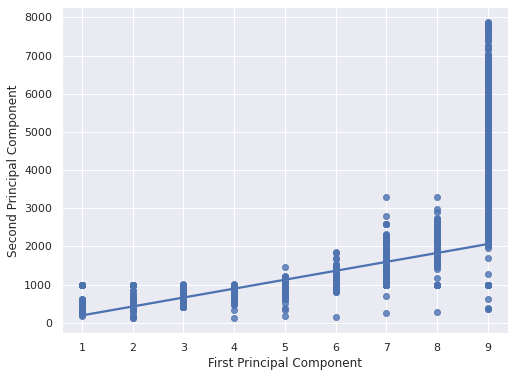

run time : 23.968419551849365


In [399]:
s_time = time.time()
# giving a larger plot
plt.figure(figsize =(8, 6))

sns.set(rc={'figure.figsize':(15,10)})
sns.regplot(x='baseRentRange',y='totalRent', data=imo)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

print(f'run time : {time.time() - s_time}')

In [400]:
s_time = time.time()
from sklearn.decomposition import PCA
pca = PCA(0.70)
x_pca =pca.fit_transform(X)
print(x_pca.shape)
print(x_pca[:1])

print(f'run time : {time.time() - s_time}')

(75884, 2)
[[-248.81220443  122.54702461]]
run time : 0.3728296756744385


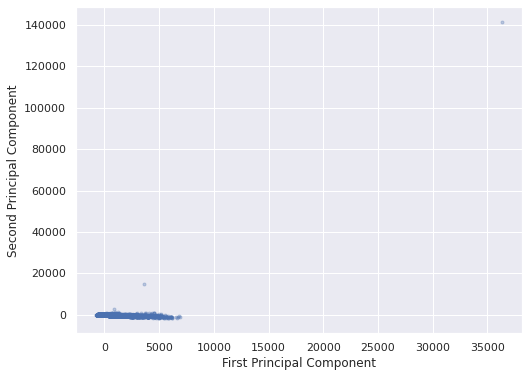

run time : 0.3648495674133301


In [401]:
s_time = time.time()

# giving a larger plot
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:,0], x_pca[:,1],marker='.',cmap ='plasma',alpha=0.3)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

print(f'run time : {time.time() - s_time}')

In [402]:
s_time = time.time()

from sklearn.decomposition import PCA
pca = PCA(0.80)
x_pca =pca.fit_transform(X)
print(x_pca.shape)
print(x_pca[:1])
print(f'run time : {time.time() - s_time}')

(75884, 2)
[[-248.81220443  122.54702461]]
run time : 0.07271289825439453


In [403]:
s_time = time.time()

from sklearn.decomposition import PCA
pca = PCA(0.90)
x_pca =pca.fit_transform(X)
print(x_pca.shape)
print(x_pca[:1])
print(f'run time : {time.time() - s_time}')

(75884, 2)
[[-248.81220443  122.54702461]]
run time : 0.07345056533813477


In [404]:
s_time = time.time()

from sklearn.decomposition import PCA
pca = PCA(0.99)
x_pca =pca.fit_transform(X)
print(x_pca.shape)
print(x_pca[:1])
print(f'run time : {time.time() - s_time}')

(75884, 2)
[[-248.81220443  122.54702461]]
run time : 0.0753939151763916


run time : 0.0278475284576416


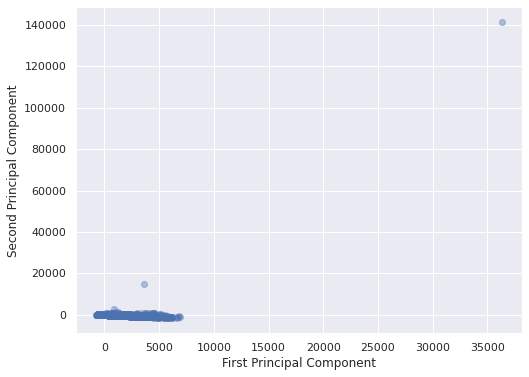

In [405]:
s_time = time.time()
# giving a larger plot
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], cmap ='plasma',alpha=0.4)

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

print(f'run time : {time.time() - s_time}')

In [406]:
s_time = time.time()
print(X.describe())
print(f'run time : {time.time() - s_time}')

       serviceCharge  yearConstructed  yearConstructedRange      baseRent  \
count   75884.000000     75884.000000          75884.000000  75884.000000   
mean      188.674268        59.393742              3.668176    866.710248   
std       543.028062        43.554601              2.590331    673.147128   
min         0.000000        -4.000000              1.000000     89.000000   
25%       125.000000        31.000000              1.000000    420.000000   
50%       165.000000        54.832749              3.821194    630.000000   
75%       223.635000        85.000000              5.000000   1100.000000   
max    146118.000000       995.000000              9.000000   7800.000000   

        livingSpace  baseRentRange       noRooms         floor       balcony  \
count  75884.000000   75884.000000  75884.000000  75884.000000  75884.000000   
mean      87.608955       4.722748      3.020330      2.362199      0.000013   
std       35.659764       2.280652      0.851343      5.022582    

In [407]:
s_time = time.time()
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)

print(f'run time : {time.time() - s_time}')

run time : 0.0510408878326416


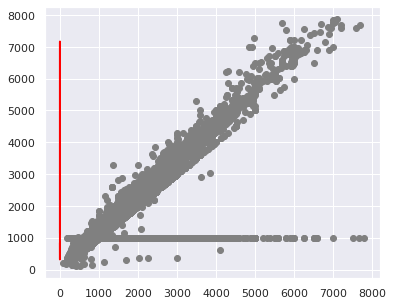

run time : 1.194551706314087


In [410]:
s_time = time.time()

plt.figure(figsize =(6,5))
plt.scatter(X['baseRent'],y,color='gray')
plt.plot(X['regio2_edit'],y_pred,color='red',linewidth=2)
plt.show()

print(f'run time : {time.time() - s_time}')

**linear regression**

In [411]:
s_time = time.time()
import numpy as np
from sklearn.linear_model import LinearRegression

In [412]:
x = np.array(imo['totalRent']).reshape((-1, 1))
y = np.array(X)

In [413]:
s_time = time.time()
model = LinearRegression()
print(f'run time : {time.time() - s_time}')

run time : 0.00011014938354492188


In [414]:
s_time = time.time()
model.fit(x, y)
model = LinearRegression().fit(x, y)

print(f'run time : {time.time() - s_time}')

run time : 0.08509969711303711


**Get results**

properties of the model

In [415]:
s_time = time.time()
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:')
print(model.intercept_)
print('slope:')
print(model.coef_)
print(f'run time : {time.time() - s_time}')

coefficient of determination: 0.10881898717800491
intercept:
[ 8.64283250e+01  7.10347016e+01  2.43177998e+00 -8.27744493e+01
  5.42079582e+01  1.95612336e+00  2.53255747e+00  2.21262602e+00
  1.98581055e-05  6.05573737e-06  1.79677812e-05  2.75319221e-05
  2.75319221e-05  6.05573737e-06  1.53341774e-05  1.79677812e-05
  1.98581055e-05  9.99808178e-01  3.36604736e-05]
slope:
[[ 9.62195499e-02]
 [-1.09548398e-02]
 [ 1.16352258e-03]
 [ 8.93521907e-01]
 [ 3.14323366e-02]
 [ 2.60355920e-03]
 [ 4.59023486e-04]
 [ 1.40757324e-04]
 [-6.28637090e-09]
 [ 6.70248329e-09]
 [-4.50746261e-09]
 [-1.35078915e-08]
 [-1.35078915e-08]
 [ 6.70248329e-09]
 [-2.02908391e-09]
 [-4.50746261e-09]
 [-6.28637090e-09]
 [ 5.65027924e-08]
 [-1.92752251e-08]]
run time : 0.03470659255981445


In [416]:
s_time = time.time()

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
print(f'run time : {time.time() - s_time}')

predicted response:
[[1.67252747e+02 6.18326362e+01 3.40913895e+00 ... 1.45775539e-05
  9.99855641e-01 1.74692846e-05]
 [1.67252747e+02 6.18326362e+01 3.40913895e+00 ... 1.45775539e-05
  9.99855641e-01 1.74692846e-05]
 [2.11513740e+02 5.67934099e+01 3.94435933e+00 ... 1.16858233e-05
  9.99881632e-01 8.60268102e-06]
 ...
 [1.50895423e+02 6.36949590e+01 3.21134011e+00 ... 1.56462370e-05
  9.99846035e-01 2.07460728e-05]
 [1.84091168e+02 5.99155393e+01 3.61275540e+00 ... 1.34774390e-05
  9.99865529e-01 1.40961202e-05]
 [1.81759935e+02 6.01809561e+01 3.58456526e+00 ... 1.36297469e-05
  9.99864160e-01 1.45631255e-05]]
run time : 0.015060663223266602


**Linear Regression**

MAE: 11.217060927099983
MSE: 19671.452668274964
R2_score: 0.10881898717800491
run time : 0.32375025749206543


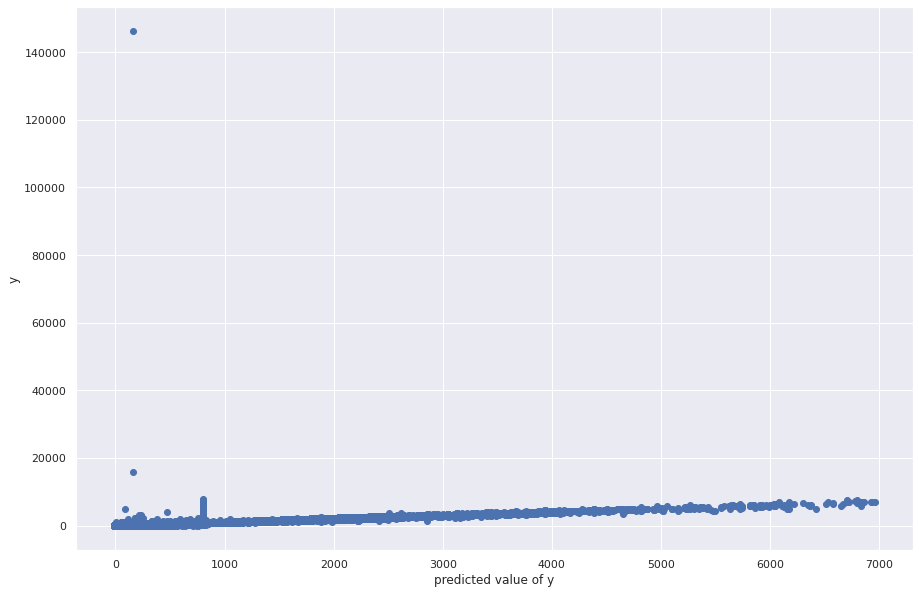

In [417]:
from pyparsing.core import LineStart
s_time = time.time()

from sklearn import metrics
prediction = []
def linearregression(X, y_pred, x, y):
    linreg = LinearRegression()
    linreg.fit(X, y_pred)
    y_pred = linreg.predict(X)

print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('R2_score:', metrics.r2_score(y, y_pred))

plt.scatter(y_pred,y)
plt.xlabel('predicted value of y')
plt.ylabel('y')

linearregression(X, y_pred, x, y)
print(f'run time : {time.time() - s_time}')

MAE: 11.217060927099983
MSE: 19671.452668274964
R2_score: 0.10881898717800491


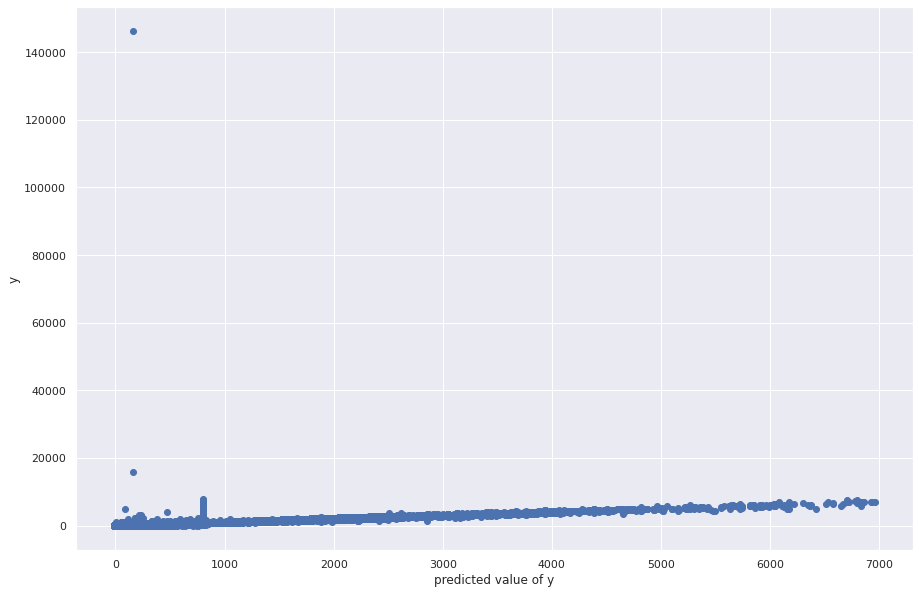

<Figure size 1080x720 with 0 Axes>

In [418]:
s_time = time.time()

from sklearn import metrics
prediction = []
def linearregression(X, y_pred, x, y):
    linreg = LinearRegression()
    linreg.fit(X, y_pred)
    y_pred = linreg.predict(X)

print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('R2_score:', metrics.r2_score(y, y_pred))

plt.scatter(y_pred,y)
plt.xlabel('predicted value of y')
plt.ylabel('y')
plt.figure()
linearregression(X, y_pred, x, y)

Random Forest Regresson

MAE: 10.545224858622028
MSE: 18108.831352851692
R2_score: 0.11744747218512162
run time : 68.35182023048401


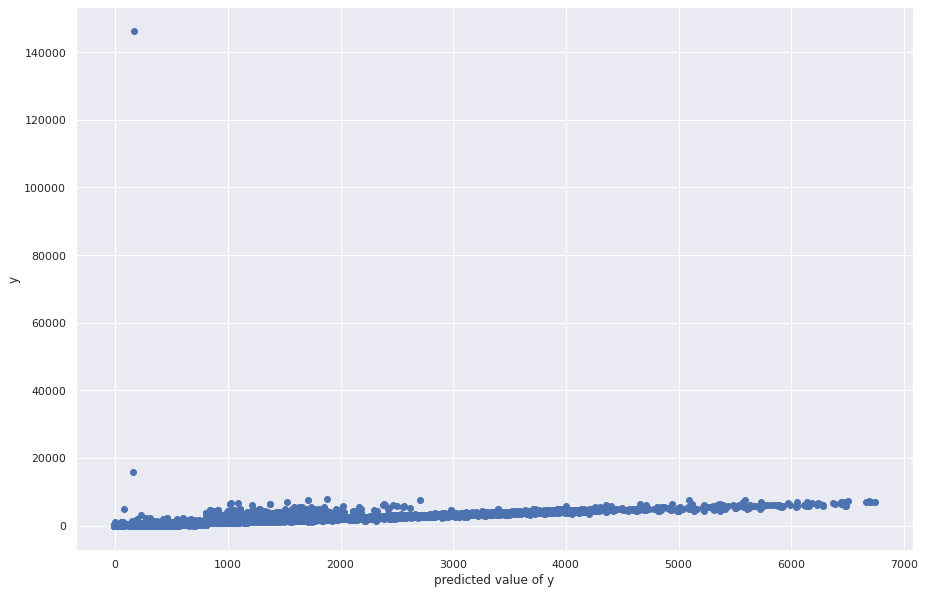

<Figure size 1080x720 with 0 Axes>

In [419]:
s_time = time.time()

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def RandomForest(X, y_pred, x, y):
    randomForest = RandomForestRegressor()
    randomForest.fit(X, y_pred)
    y_pred = randomForest.predict(X)
    
    print('MAE:', metrics.mean_absolute_error(y, y_pred))
    print('MSE:', metrics.mean_squared_error(y, y_pred))
    print('R2_score:', metrics.r2_score(y, y_pred))

    plt.scatter(y_pred,y,cmap ='plasma')
    plt.xlabel('predicted value of y')
    plt.ylabel('y')
    plt.figure()

RandomForest(X, y_pred, x, y)

print(f'run time : {time.time() - s_time}')

**polynomial regression**

In [420]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array(imo['totalRent']).reshape((-1, 1))
y = np.array(X)

In [421]:
s_time = time.time()
transformer = PolynomialFeatures(degree=2, include_bias=False)
print(f'run time : {time.time() - s_time}')

run time : 9.72747802734375e-05


In [422]:
s_time = time.time()
transformer.fit(x)   #we need to fit before transfer
print(f'run time : {time.time() - s_time}')

run time : 0.0007755756378173828


In [424]:
s_time = time.time()
x_ = transformer.transform(x)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
print(x_)
print(f'run time : {time.time() - s_time}')

[[8.40000000e+02 7.05600000e+05]
 [8.40000000e+02 7.05600000e+05]
 [1.30000000e+03 1.69000000e+06]
 ...
 [6.70000000e+02 4.48900000e+05]
 [1.01500000e+03 1.03022500e+06]
 [9.90771730e+02 9.81628621e+05]]
run time : 0.004843235015869141


In [425]:
s_time = time.time()
model = LinearRegression().fit(x_, y)   #creating model and fit to x_
print(f'run time : {time.time() - s_time}')

run time : 0.06010246276855469


**Get results**

properties of the model

In [426]:
s_time = time.time()
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:')
print(model.intercept_)
print('coefficients:')
print(model.coef_)
print(f'run time : {time.time() - s_time}')

coefficient of determination: 0.12054695054558744
intercept:
[ 9.05010317e+01  8.25946248e+01  1.35353548e+00 -9.21291149e+01
  5.19470635e+01 -6.64213052e-02  2.47039957e+00  2.31203141e+00
  2.02433166e-05 -1.35893138e-05  1.50471282e-05  4.31710576e-05
  4.31710576e-05 -1.35893138e-05  8.10545765e-06  1.50471282e-05
  2.02433166e-05  9.99798555e-01  6.35952653e-05]
coefficients:
[[ 9.01507005e-02  1.48898264e-06]
 [-2.81805912e-02  4.22631096e-06]
 [ 2.77024362e-03 -3.94206476e-07]
 [ 9.07461545e-01 -3.42006821e-06]
 [ 3.48013564e-02 -8.26583708e-07]
 [ 5.61740724e-03 -7.39442864e-07]
 [ 5.51646632e-04 -2.27249427e-08]
 [-7.36930913e-06  3.63426358e-08]
 [-6.86038434e-09  1.40833292e-13]
 [ 3.59761009e-08 -7.18223591e-12]
 [-1.55319361e-10 -1.06779148e-12]
 [-3.68121866e-08  5.71767205e-12]
 [-3.68121866e-08  5.71767205e-12]
 [ 3.59761009e-08 -7.18223591e-12]
 [ 8.74262526e-09 -2.64282186e-12]
 [-1.55319361e-10 -1.06779148e-12]
 [-6.86038434e-09  1.40833292e-13]
 [ 7.08428144e-08 -3

**Fitting Logistic Regression To the dataset**

In [428]:
s_time = time.time()
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
df=imo._get_numeric_data()

# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
print(x_pca.shape)
print(f'run time : {time.time() - s_time}')

(75884, 2)
run time : 0.3348081111907959


run time : 0.030674219131469727


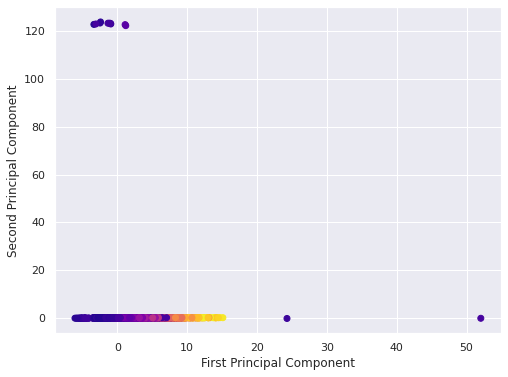

In [429]:
s_time = time.time()
# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = imo['totalRent'], cmap ='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

print(f'run time : {time.time() - s_time}')

In [430]:
# components
pca.components_

array([[ 9.17878304e-02,  4.66229805e-01, -1.85339087e-01,
         2.59346019e-01,  4.79987687e-01,  3.92679375e-01,
         4.56869835e-01,  2.81228569e-01,  1.15595746e-02,
        -9.68388676e-04,  9.22647612e-04, -1.75412613e-03,
        -2.03810311e-03, -2.28534715e-03,  1.26327810e-03,
        -2.93376814e-03, -8.71019754e-04, -8.50534887e-04,
         4.12459184e-03, -3.52696899e-03],
       [-1.07476416e-03,  2.53875442e-03, -8.75387362e-03,
         6.88215764e-03,  1.98931785e-03, -1.63580108e-03,
         2.48015149e-03, -3.19071457e-04, -3.93821022e-04,
         2.24093813e-01,  2.22139446e-01,  2.24433274e-01,
         2.26311332e-01,  2.24702701e-01,  2.20605945e-01,
         2.23241606e-01,  2.24451582e-01,  2.23231596e-01,
        -7.07068624e-01,  2.22603418e-01]])

# Feature Engineering

trying to create more variables for inspect and building a model from new variables later

Create a new columns for the price per square meter

In [447]:
imo['Pricepm2'] = imo['baseRent'] / imo['livingSpace']
imo['additioncost'] = imo['totalRent'] - imo['baseRent']

In [448]:
fig = px.scatter(imo, x='totalRent', y='Pricepm2')
fig.show()

In [449]:
min=imo['totalRent'].sort_values().head(1)
max=imo['totalRent'].sort_values().tail(1)

In [450]:
imo['totalRent'].values

array([840., 840., 380., ..., 620., 610., 670.])

In [451]:
imo = imo[(imo['baseRent'] > 200) & (imo['baseRent'] < 800)]
imo = imo[(imo['totalRent'] > 200) & (imo['totalRent'] < 900)]
imo = imo[(imo['totalRent'] > imo['baseRent'])]
imo = imo[(imo['totalRent'] - imo['baseRent']) < 500]
fig = px.scatter(imo, x='totalRent', y='baseRent')
fig.show()

In [452]:
imo['Pricepm2'] = imo['baseRent'] / imo['livingSpace']
imo['additioncost'] = imo['totalRent'] - imo['baseRent']
fig = px.scatter(imo, x='totalRent', y='Pricepm2')
fig.show()

In [453]:
imo.describe()

,serviceCharge,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,floor,balcony,cellar,condition,condition_edit,garden,hasKitchen,heatingType_edit,lift,newlyConst,regio2_edit,typeOfFlat,Pricepm2,additioncost
count,36063.000000,36063.000000,36063.000000,36063.000000,36063.000000,36063.000000,36063.000000,36063.000000,36063.000000,36063.000000,36063.0,36063.0,36063.000000,36063.000000,36063.0,36063.0,36063.0,36063.000000,36063.000000,36063.000000,36063.000000,36063.000000
mean,147.378916,618.555594,68.734646,2.766763,452.430334,72.457329,2.955356,2.801172,2.359843,0.000028,0.0,0.0,0.000028,0.000028,0.0,0.0,0.0,0.000028,0.999861,0.000028,6.286284,166.125260
std,774.446285,132.586459,42.208531,1.654499,116.903666,11.850260,1.147805,0.670003,6.107668,0.005266,0.0,0.0,0.005266,0.005266,0.0,0.0,0.0,0.005266,0.011774,0.005266,1.556070,42.967311
min,0.000000,293.560000,2.000000,1.000000,204.000000,60.000000,1.000000,1.000000,-1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.801233,12.000000
25%,110.000000,510.000000,49.000000,1.000000,359.000000,64.000000,2.000000,2.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,5.091837,140.000000
50%,143.000000,600.000000,54.832749,3.000000,432.700000,69.500000,3.000000,3.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,6.000000,160.000000
75%,170.000000,719.000000,95.000000,3.821194,535.000000,77.665000,4.000000,3.000000,3.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,7.099963,190.000000
max,146118.000000,899.960000,995.000000,9.000000,799.470000,649.000000,5.000000,11.000000,999.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,13.250000,430.000000


In [454]:
imo['serviceCharge'].describe()

count     36063.000000
mean        147.378916
std         774.446285
min           0.000000
25%         110.000000
50%         143.000000
75%         170.000000
max      146118.000000
Name: serviceCharge, dtype: float64

In [455]:
df = imo[(imo['serviceCharge'] < 0.1)]
fig = px.scatter(df, x='totalRent', y='baseRent')
fig.show()

Fill all the missing values

In [456]:
df=imo.copy
df

<bound method NDFrame.copy of         serviceCharge  totalRent  yearConstructed  yearConstructedRange  \
0              245.00     840.00        57.000000              2.000000   
1              245.00     840.00        57.000000              2.000000   
6               70.00     380.00        54.832749              3.821194   
7               88.00     584.25        63.000000              2.000000   
8               88.00     584.25        63.000000              2.000000   
...               ...        ...              ...                   ...   
268828         170.00     805.00        58.000000              2.000000   
268829         250.94     828.77        50.000000              3.000000   
268831         140.00     620.00        54.832749              3.821194   
268834         170.00     610.00        54.832749              3.821194   
268844          80.00     670.00        54.832749              3.821194   

        baseRent  livingSpace  baseRentRange  noRooms     floor  balc

In [457]:
imo['heatingType_edit'].fillna(imo['heatingType_edit'].mode()[0], inplace=True)
imo['typeOfFlat'].fillna(imo['typeOfFlat'].mode()[0], inplace=True)

In [458]:
heatinglist = list(imo['heatingType_edit'].value_counts().head(10).index)
df = imo[pd.DataFrame(imo['heatingType_edit'].tolist()).isin(heatinglist).any(1).values]
df

,serviceCharge,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,floor,balcony,cellar,condition,condition_edit,garden,hasKitchen,heatingType_edit,lift,newlyConst,regio2_edit,typeOfFlat,Pricepm2,additioncost
0,245.00,840.00,57.000000,2.000000,595.00,86.00,4.0,4.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.918605,245.00
1,245.00,840.00,57.000000,2.000000,595.00,86.00,4.0,4.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.918605,245.00
6,70.00,380.00,54.832749,3.821194,310.00,62.00,2.0,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.000000,70.00
7,88.00,584.25,63.000000,2.000000,452.25,60.30,3.0,3.0,2.122311,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.500000,132.00
8,88.00,584.25,63.000000,2.000000,452.25,60.30,3.0,3.0,2.122311,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.500000,132.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268828,170.00,805.00,58.000000,2.000000,565.00,108.00,4.0,3.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.231481,240.00
268829,250.94,828.77,50.000000,3.000000,577.83,72.64,4.0,3.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.954708,250.94
268831,140.00,620.00,54.832749,3.821194,480.00,64.51,3.0,3.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.440707,140.00
268834,170.00,610.00,54.832749,3.821194,440.00,70.49,3.0,3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.242020,170.00


# Multiprocessing

In [459]:
!pip install pyspark

In [460]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

In [263]:
from multiprocessing import Pool, cpu_count

In [461]:
cpu_count()

2

In [462]:
s_time = time.time()

spark = SparkSession.builder.getOrCreate()

sdf = spark.createDataFrame(imo)
imo['yearConstructedRange'].round(3)
sdf.show()

print(f'run time : {time.time() - s_time}')

+-------------+---------+------------------+--------------------+--------+-----------+-------------+-------+-----------------+-------+------+---------+--------------+------+----------+----------------+----+----------+-----------+----------+------------------+------------+
|serviceCharge|totalRent|   yearConstructed|yearConstructedRange|baseRent|livingSpace|baseRentRange|noRooms|            floor|balcony|cellar|condition|condition_edit|garden|hasKitchen|heatingType_edit|lift|newlyConst|regio2_edit|typeOfFlat|          Pricepm2|additioncost|
+-------------+---------+------------------+--------------------+--------+-----------+-------------+-------+-----------------+-------+------+---------+--------------+------+----------+----------------+----+----------+-----------+----------+------------------+------------+
|        245.0|    840.0|              57.0|                 2.0|   595.0|       86.0|          4.0|    4.0|              1.0|    0.0|   0.0|      0.0|           0.0|   0.0|       0

In [464]:
sdf.columns

['serviceCharge',
 'totalRent',
 'yearConstructed',
 'yearConstructedRange',
 'baseRent',
 'livingSpace',
 'baseRentRange',
 'noRooms',
 'floor',
 'balcony',
 'cellar',
 'condition',
 'condition_edit',
 'garden',
 'hasKitchen',
 'heatingType_edit',
 'lift',
 'newlyConst',
 'regio2_edit',
 'typeOfFlat',
 'Pricepm2',
 'additioncost']

In [465]:
from pyspark.sql import Column
from pyspark.sql.functions import upper

type(sdf.baseRent) == type(upper(sdf.baseRent)) == type(sdf.baseRent.isNull())

True

In [466]:
sdf.select(sdf.typeOfFlat).show()

+----------+
|typeOfFlat|
+----------+
|       0.0|
|       0.0|
|       1.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
|       0.0|
+----------+
only showing top 20 rows



In [467]:
sdf.select(sdf.baseRent).show()

+--------+
|baseRent|
+--------+
|   595.0|
|   595.0|
|   310.0|
|  452.25|
|  452.25|
|   400.0|
|  315.18|
|   400.0|
|   365.0|
|   340.0|
|   396.8|
|   560.0|
|   400.0|
|   640.0|
|   532.0|
|   515.0|
|   500.0|
|   315.0|
|   333.8|
|   325.0|
+--------+
only showing top 20 rows



In [468]:
s_time=time.time()
sdf.groupby('totalRent').avg().show()
print(f'run time : {time.time() - s_time}')

+---------+------------------+--------------+--------------------+-------------------------+------------------+-----------------+------------------+------------------+------------------+------------+-----------+--------------+-------------------+-----------+---------------+---------------------+---------+---------------+----------------+---------------+------------------+------------------+
|totalRent|avg(serviceCharge)|avg(totalRent)|avg(yearConstructed)|avg(yearConstructedRange)|     avg(baseRent)| avg(livingSpace)|avg(baseRentRange)|      avg(noRooms)|        avg(floor)|avg(balcony)|avg(cellar)|avg(condition)|avg(condition_edit)|avg(garden)|avg(hasKitchen)|avg(heatingType_edit)|avg(lift)|avg(newlyConst)|avg(regio2_edit)|avg(typeOfFlat)|     avg(Pricepm2)| avg(additioncost)|
+---------+------------------+--------------+--------------------+-------------------------+------------------+-----------------+------------------+------------------+------------------+------------+-----------+-

In [469]:
s_time=time.time()
sdf.filter(sdf.baseRent < 1500).show()
print(f'run time : {time.time() - s_time}')

+-------------+---------+------------------+--------------------+--------+-----------+-------------+-------+-----------------+-------+------+---------+--------------+------+----------+----------------+----+----------+-----------+----------+------------------+------------+
|serviceCharge|totalRent|   yearConstructed|yearConstructedRange|baseRent|livingSpace|baseRentRange|noRooms|            floor|balcony|cellar|condition|condition_edit|garden|hasKitchen|heatingType_edit|lift|newlyConst|regio2_edit|typeOfFlat|          Pricepm2|additioncost|
+-------------+---------+------------------+--------------------+--------+-----------+-------------+-------+-----------------+-------+------+---------+--------------+------+----------+----------------+----+----------+-----------+----------+------------------+------------+
|        245.0|    840.0|              57.0|                 2.0|   595.0|       86.0|          4.0|    4.0|              1.0|    0.0|   0.0|      0.0|           0.0|   0.0|       0

In [470]:
sdf.printSchema()

root
 |-- serviceCharge: double (nullable = true)
 |-- totalRent: double (nullable = true)
 |-- yearConstructed: double (nullable = true)
 |-- yearConstructedRange: double (nullable = true)
 |-- baseRent: double (nullable = true)
 |-- livingSpace: double (nullable = true)
 |-- baseRentRange: double (nullable = true)
 |-- noRooms: double (nullable = true)
 |-- floor: double (nullable = true)
 |-- balcony: double (nullable = true)
 |-- cellar: double (nullable = true)
 |-- condition: double (nullable = true)
 |-- condition_edit: double (nullable = true)
 |-- garden: double (nullable = true)
 |-- hasKitchen: double (nullable = true)
 |-- heatingType_edit: double (nullable = true)
 |-- lift: double (nullable = true)
 |-- newlyConst: double (nullable = true)
 |-- regio2_edit: double (nullable = true)
 |-- typeOfFlat: double (nullable = true)
 |-- Pricepm2: double (nullable = true)
 |-- additioncost: double (nullable = true)



In [471]:
sdf.groupBy('livingSpace','baseRentRange').count().show()

+-----------+-------------+-----+
|livingSpace|baseRentRange|count|
+-----------+-------------+-----+
|      64.04|          2.0|    3|
|      67.98|          1.0|    2|
|       83.0|          2.0|   31|
|       64.0|          5.0|   56|
|       66.0|          5.0|   42|
|       69.8|          3.0|    8|
|      649.0|          4.0|    1|
|      74.58|          3.0|    9|
|      67.48|          2.0|    5|
|       76.5|          2.0|   12|
|      62.67|          2.0|   10|
|      60.64|          5.0|    1|
|      107.0|          5.0|   12|
|       78.7|          4.0|    2|
|      73.35|          2.0|    1|
|      72.49|          3.0|    1|
|      70.75|          4.0|    4|
|      60.45|          5.0|    2|
|      84.72|          5.0|    1|
|      63.57|          2.0|    3|
+-----------+-------------+-----+
only showing top 20 rows



In [472]:
s_time=time.time()
sdf.orderBy("livingSpace").show()
print(f'run time : {time.time() - s_time}')

+-------------+---------+------------------+--------------------+--------+-----------+-------------+-------+-----------------+-------+------+---------+--------------+------+----------+----------------+----+----------+-----------+----------+-----------------+------------+
|serviceCharge|totalRent|   yearConstructed|yearConstructedRange|baseRent|livingSpace|baseRentRange|noRooms|            floor|balcony|cellar|condition|condition_edit|garden|hasKitchen|heatingType_edit|lift|newlyConst|regio2_edit|typeOfFlat|         Pricepm2|additioncost|
+-------------+---------+------------------+--------------------+--------+-----------+-------------+-------+-----------------+-------+------+---------+--------------+------+----------+----------------+----+----------+-----------+----------+-----------------+------------+
|        145.0|    582.5|54.832749319931736|   3.821193923186869|   437.5|       60.0|          3.0|    2.0|2.122310554803789|    0.0|   0.0|      0.0|           0.0|   0.0|       0.0|

In [473]:
s_time=time.time()
from pyspark.sql.functions import when

sdf.select("yearConstructed", when(sdf.serviceCharge >= 100, "high service range")).show()
print(f'run time : {time.time() - s_time}')

+------------------+------------------------------------------------------------+
|   yearConstructed|CASE WHEN (serviceCharge >= 100) THEN high service range END|
+------------------+------------------------------------------------------------+
|              57.0|                                          high service range|
|              57.0|                                          high service range|
|54.832749319931736|                                                        null|
|              63.0|                                                        null|
|              63.0|                                                        null|
|             130.0|                                          high service range|
|              46.0|                                          high service range|
|54.832749319931736|                                          high service range|
|             117.0|                                          high service range|
|54.832749319931

In [474]:
s_time=time.time()
print(sdf.dtypes)

print(f'run time : {time.time() - s_time}')

[('serviceCharge', 'double'), ('totalRent', 'double'), ('yearConstructed', 'double'), ('yearConstructedRange', 'double'), ('baseRent', 'double'), ('livingSpace', 'double'), ('baseRentRange', 'double'), ('noRooms', 'double'), ('floor', 'double'), ('balcony', 'double'), ('cellar', 'double'), ('condition', 'double'), ('condition_edit', 'double'), ('garden', 'double'), ('hasKitchen', 'double'), ('heatingType_edit', 'double'), ('lift', 'double'), ('newlyConst', 'double'), ('regio2_edit', 'double'), ('typeOfFlat', 'double'), ('Pricepm2', 'double'), ('additioncost', 'double')]
run time : 0.0015878677368164062


In [475]:
s_time=time.time()
def my_func(group):
    group['livingSpace'] = (group['yearConstructed'].astype(int))+'_'+group['livingSpace']
    group['rentpermeter'] = group['baseRent']/ group['livingSpace']
    group['serviceCharge'] = group['serviceCharge'].mean()
    group.drop(columns=['celler','balcony'],inplace=True)
    return group
print(f'run time : {time.time() - s_time}')

run time : 0.0002167224884033203


In [476]:
sdf.columns

['serviceCharge',
 'totalRent',
 'yearConstructed',
 'yearConstructedRange',
 'baseRent',
 'livingSpace',
 'baseRentRange',
 'noRooms',
 'floor',
 'balcony',
 'cellar',
 'condition',
 'condition_edit',
 'garden',
 'hasKitchen',
 'heatingType_edit',
 'lift',
 'newlyConst',
 'regio2_edit',
 'typeOfFlat',
 'Pricepm2',
 'additioncost']

In [477]:
s_time = time.time()
sdf=sdf.drop_duplicates()

print(f'run time : {time.time() - s_time}')

run time : 0.006994009017944336


In [478]:
sdf.dtypes

[('serviceCharge', 'double'),
 ('totalRent', 'double'),
 ('yearConstructed', 'double'),
 ('yearConstructedRange', 'double'),
 ('baseRent', 'double'),
 ('livingSpace', 'double'),
 ('baseRentRange', 'double'),
 ('noRooms', 'double'),
 ('floor', 'double'),
 ('balcony', 'double'),
 ('cellar', 'double'),
 ('condition', 'double'),
 ('condition_edit', 'double'),
 ('garden', 'double'),
 ('hasKitchen', 'double'),
 ('heatingType_edit', 'double'),
 ('lift', 'double'),
 ('newlyConst', 'double'),
 ('regio2_edit', 'double'),
 ('typeOfFlat', 'double'),
 ('Pricepm2', 'double'),
 ('additioncost', 'double')]

In [213]:
#sdf = sdf.to_pandas_on_spark()